In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import tensorflow as tf

In [5]:
x_data = np.linspace(0.0,10.0,1000000)
noise = np.random.randn(len(x_data))
y_true = (0.5 * x_data) + 5 + noise

In [7]:
feat_cols = [ tf.feature_column.numeric_column('x',shape=[1]) ]
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\hosni\\AppData\\Local\\Temp\\tmpwio8uttc', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000016321E0AB70>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [9]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data,y_true,test_size=0.3,random_state=101)

In [12]:
x_train.shape

(700000,)

In [14]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=None,shuffle=True)

In [15]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=1000,shuffle=False)

In [16]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,batch_size=8,num_epochs=1000,shuffle=False)

In [17]:
estimator.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\hosni\AppData\Local\Temp\tmpwio8uttc\model.ckpt.
INFO:tensorflow:loss = 581.8395, step = 1
INFO:tensorflow:global_step/sec: 1001.35
INFO:tensorflow:loss = 13.421916, step = 101 (0.100 sec)
INFO:tensorflow:global_step/sec: 1472.53
INFO:tensorflow:loss = 29.018581, step = 201 (0.068 sec)
INFO:tensorflow:global_step/sec: 1472.56
INFO:tensorflow:loss = 9.676577, step = 301 (0.068 sec)
INFO:tensorflow:global_step/sec: 1390.7
INFO:tensorflow:loss = 3.9906137, step = 401 (0.068 sec)
INFO:tensorflow:global_step/sec: 1390.79
INFO:tensorflow:loss = 5.4673033, step = 501 (0.076 sec)
INFO:tensorflow:global_step/sec: 1192.08
INFO:tensorflow:loss = 5.895528, step = 601 (0.084 sec)
INFO:tensorflow:global_step/sec:

In [19]:
train_metric = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-12-01:28:48
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\hosni\AppData\Local\Temp\tmpwio8uttc\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-06-12-01:28:49
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1083286, global_step = 1000, loss = 8.866629


In [21]:
eval_metric = estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-12-01:30:14
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\hosni\AppData\Local\Temp\tmpwio8uttc\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-06-12-01:30:15
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0819477, global_step = 1000, loss = 8.655581


In [23]:
train_metric

{'average_loss': 1.1083286, 'global_step': 1000, 'loss': 8.866629}

In [24]:
eval_metric

{'average_loss': 1.0819477, 'global_step': 1000, 'loss': 8.655581}

In [26]:
new_data = np.linspace(0,10,10)
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':new_data},shuffle=False)

In [28]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\hosni\AppData\Local\Temp\tmpwio8uttc\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.4007983], dtype=float32)},
 {'predictions': array([5.0562286], dtype=float32)},
 {'predictions': array([5.7116585], dtype=float32)},
 {'predictions': array([6.367089], dtype=float32)},
 {'predictions': array([7.022519], dtype=float32)},
 {'predictions': array([7.677949], dtype=float32)},
 {'predictions': array([8.33338], dtype=float32)},
 {'predictions': array([8.98881], dtype=float32)},
 {'predictions': array([9.644239], dtype=float32)},
 {'predictions': array([10.299669], dtype=float32)}]

In [29]:
predictions = []

for pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred['predictions'])

predictions

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\hosni\AppData\Local\Temp\tmpwio8uttc\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[array([4.4007983], dtype=float32),
 array([5.0562286], dtype=float32),
 array([5.7116585], dtype=float32),
 array([6.367089], dtype=float32),
 array([7.022519], dtype=float32),
 array([7.677949], dtype=float32),
 array([8.33338], dtype=float32),
 array([8.98881], dtype=float32),
 array([9.644239], dtype=float32),
 array([10.299669], dtype=float32)]

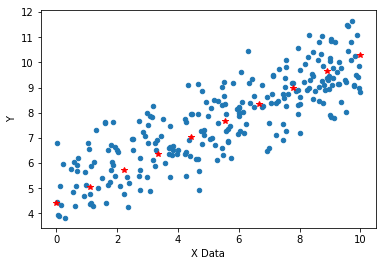

In [36]:
x_df = pd.DataFrame(data=x_data,columns=['X Data'])
y_df = pd.DataFrame(data=y_true,columns=['Y'])
my_data = pd.concat([x_df,y_df],axis=1)
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(new_data,predictions,'r*')